In [1]:
%pip install numpy matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


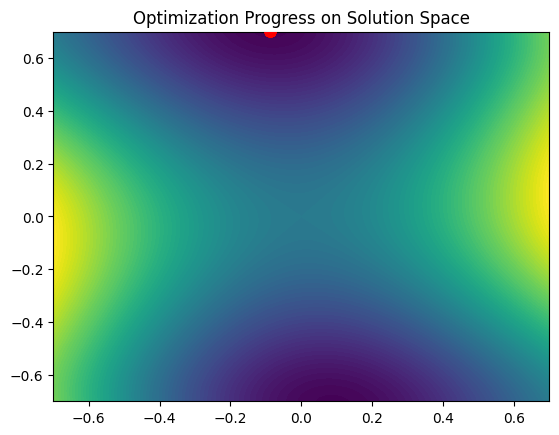

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def objective(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    return 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4

def update_population(x, f):
    row, col = x.shape
    best = x[np.argmin(f)]
    worst = x[np.argmax(f)]
    x_new = np.zeros((row, col))
    for i in range(row):
        k = np.random.randint(row)
        while k == i:
            k = np.random.randint(row)
        r = np.random.rand(2)
        if f[i] < f[k]:
            x_new[i] = x[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(x[i]) - x[k])
        else:
            x_new[i] = x[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(x[k]) - x[i])
    return x_new

def trimr(mini, maxi, x):
    return np.clip(x, mini, maxi)

def plot_contours(ax):
    x1_range = np.linspace(-0.7, 0.7, 400)
    x2_range = np.linspace(-0.7, 0.7, 400)
    x1, x2 = np.meshgrid(x1_range, x2_range)
    z = objective(np.array([x1.ravel(), x2.ravel()]).T).reshape(400, 400)
    contour = ax.contourf(x1, x2, z, levels=100, cmap="viridis")
    return contour

def rao_3():
    pop = 50  # Population size
    var = 2  # Number of design variables for visualization purposes
    max_fes = 30000  # Maximum functions evaluation
    max_gen = min(100, max_fes // pop)  # Limiting the max generations for GIF clarity
    mini = -0.7 * np.ones(var)
    maxi = 0.7 * np.ones(var)
    x = np.random.rand(pop, var) * (maxi - mini) + mini
    f = objective(x)

    fig, ax = plt.subplots()
    plot_contours(ax)
    scat = ax.scatter(x[:, 0], x[:, 1], color='red', zorder=5)

    def update(frame):
        nonlocal x, f
        x_new = update_population(x, f)
        x_new = trimr(mini, maxi, x_new)
        f_new = objective(x_new)
        for i in range(pop):
            if f_new[i] < f[i]:
                x[i, :] = x_new[i, :]
                f[i] = f_new[i]
        scat.set_offsets(x)
        return scat,

    ani = FuncAnimation(fig, update, frames=max_gen, blit=True, repeat=False)
    plt.xlim(mini[0], maxi[0])
    plt.ylim(mini[1], maxi[1])
    plt.title("Optimization Progress on Solution Space")
    ani.save('rao3_2.gif', writer='pillow', fps=10)

if __name__ == "__main__":
    rao_3()
